The attached data files are a sample of the UK Road Safety Data for 2019, available from [the UK Department for Transport](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data). The first file contains some data on accidents, while the second file contains ages of vehicles that were involved in these accidents.

    (1) Find out the number of columns and observations in each file
    (2) Find out information stored in each column and the data type of each column
    (3) Convert the column containing dates to the datetime type
    (4) Plot the number of accidents per day
    (5) Find out how many accidents happened during rain or snow? (bonus question)

You need to supply the code in cells indicated with "???"

In [1]:
# import pandas
import pandas as pd

# import seaborn
import seaborn as sns
sns.set_theme(palette="Set2")

In [7]:
# load the data
df1 = pd.read_csv("/accidents.csv")
df2 = pd.read_csv("/vehicles.csv")

# The number of columns and observations in each file

In [15]:
df1.shape

(1000, 4)

In [16]:
df2.shape

(2119, 2)

# Information stored in each column and the data type of each column

In [17]:
df1.info

<bound method DataFrame.info of     Accident_Index  Accident_Severity        Date  Weather_Conditions
0    2019010157094                  3  11/01/2019                   1
1    2019010158259                  3  18/01/2019                   1
2    2019010159183                  3  22/01/2019                   3
3    2019010159292                  3  23/01/2019                   1
4    2019010159565                  3  25/01/2019                   1
..             ...                ...         ...                 ...
995  201997GK00306                  3  03/06/2019                   1
996  201997NA01704                  3  25/04/2019                   2
997  201997ND00503                  2  24/03/2019                   2
998  201997UC70505                  1  19/05/2019                   1
999  2019980871739                  3  23/08/2019                   1

[1000 rows x 4 columns]>

In [18]:
df2.info

<bound method DataFrame.info of      Accident_Index  Age_of_Vehicle
0     2019010157094              -1
1     2019010157094              -1
2     2019010157094              -1
3     2019010158259              -1
4     2019010158259              -1
...             ...             ...
2114  201997ND00503              -1
2115  201997UC70505              -1
2116  2019980871739              -1
2117  2019980871739               8
2118  2019980871739               2

[2119 rows x 2 columns]>

# Convert column containing dates to the datetime type

In [19]:
# check how dates are represented
df1.head()

,Accident_Index,Accident_Severity,Date,Weather_Conditions
0,2019010157094,3,11/01/2019,1
1,2019010158259,3,18/01/2019,1
2,2019010159183,3,22/01/2019,3
3,2019010159292,3,23/01/2019,1
4,2019010159565,3,25/01/2019,1


In [33]:
df1["Date"] = pd.to_datetime(df1["Date"], format='%d/%m/%Y')

In [ ]:
# verify that the conversion was successful
???

# Plot the number of accidents per day

In [34]:
# Group the data by Date
tmp = df1.groupby('Date').count()
tmp.head()

,Accident_Index,Accident_Severity,Weather_Conditions
Date,,,
2019-01-01,4,4,4
2019-01-04,1,1,1
2019-01-05,1,1,1
2019-01-06,1,1,1
2019-01-07,1,1,1


<Axes: xlabel='Date'>

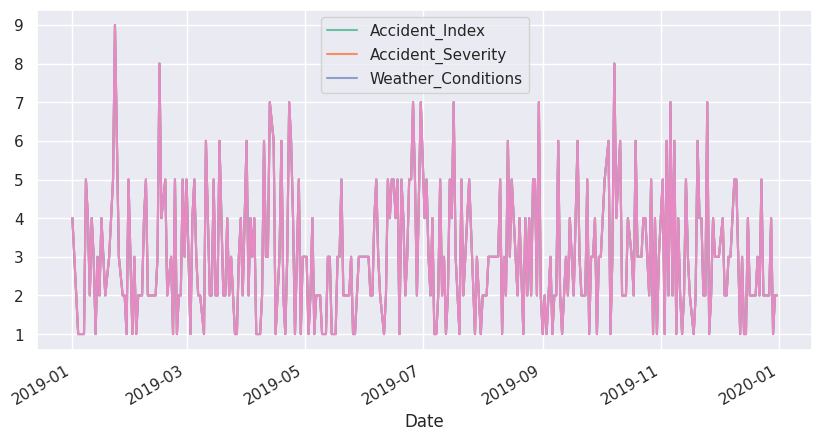

In [36]:
# plot the tmp dataframe
tmp.plot()
tmp["Accident_Index"].plot(figsize=(10,5))

# How many accidents happened during rain or snow?

In [37]:
# replace integers with string values in the "Weather_Conditions" column

replacement_dict = {
    1: "Fine no high winds",
    2: "Raining no high winds",
    3: "Snowing no high winds",
    4: "Fine + high winds",
    5: "Raining + high winds",
    6: "Snowing + high winds",
    7: "Fog or mist",
    8: "Other",
    9: "Unknown",
    -1: "Data missing or out of range"
}
df1.loc[:, 'Weather_Conditions'] = df1['Weather_Conditions'].map(replacement_dict)

/tmp/ipython-input-98461004.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Fine no high winds' 'Fine no high winds' 'Snowing no high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds'
 'Fine no high winds' 'Unknown' 'Unknown' 'Fine no high winds' 'Unknown'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds' 'Unknown'
 'Fine no high winds' 'Raining no high winds' 'Raining + high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no high winds'
 'Fine no high winds' 'Fine no high winds' 'Fine no 

In [38]:
# examine the result

# option 1
df1.head()

# option 2
df1["Weather_Conditions"].unique()


array(['Fine no high winds', 'Snowing no high winds', 'Unknown',
       'Raining no high winds', 'Raining + high winds', 'Other',
       'Fine + high winds'], dtype=object)

In [39]:
df1.head()

,Accident_Index,Accident_Severity,Date,Weather_Conditions
0,2019010157094,3,2019-01-11,Fine no high winds
1,2019010158259,3,2019-01-18,Fine no high winds
2,2019010159183,3,2019-01-22,Snowing no high winds
3,2019010159292,3,2019-01-23,Fine no high winds
4,2019010159565,3,2019-01-25,Fine no high winds


In [46]:
tmp = df1[df1["Weather_Conditions"] == ("Snowing no high winds")]
tmp.shape

(1, 4)

In [48]:
tmp = df1[df1["Weather_Conditions"] == ("Raining no high winds")]
tmp.shape

(117, 4)

In [49]:
tmp = df1[df1["Weather_Conditions"] == ("Raining + high winds")]
tmp.shape

(9, 4)

# Citing this notebook

If you use this notebook in your work, please cite it as follows:
    
Pekar, V. (2024). Machine Learning for Business Analytics. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/vpekar/bd4dm